In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X, y = load_svmlight_file("australian_scale.txt")

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)



y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)


theta = np.ones((X.shape[1], 1))
maxIteration = 100
c = 0.5
learning_rate = 0.0005

train_loss, test_loss, train_accr, test_accr = [],[],[],[]
x_todense_T = []


In [37]:
for i in range(X_train.shape[0]):
    x_todense_T.append(X_train[i].todense().T)

def cal_hinge_loss_and_grad(theta,x,y):
    loss,grad = 0,0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x_todense_T[j])[0,0])
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y[j]*x[j].todense()
    return (loss/x.shape[0],grad)

def cal_hinge_loss(theta,x,y):
    loss = 0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x[j].todense().T)[0,0])
        loss += max(0,1-v)
    return loss/x.shape[0]

def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]




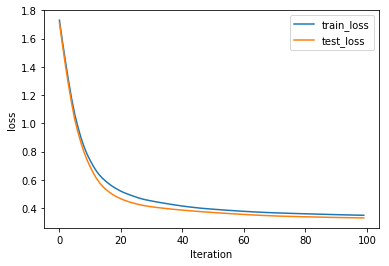

In [38]:
def gradientDescent(w):
    for i in range(maxIteration):
        current_train_loss, gradient = cal_hinge_loss_and_grad(w,X_train,y_train)
        train_loss.append(current_train_loss)
        test_loss.append( cal_hinge_loss(w,X_test,y_test))
        w = w-learning_rate*gradient.T
        train_accr.append(cal_accur(X_train,y_train,w))
        test_accr.append(cal_accur(X_test,y_test,w))
        
gradientDescent(theta)



%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss,label="test_loss" )
plt.legend(loc="upper right")